### 1.下载数据

In [1]:
import os
import tarfile
import urllib

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = 'datasets/housing'
HOUSING_URL = DOWNLOAD_ROOT + HOUSING_PATH + '/housing.tgz'
HOUSING_DATA = 'housing.csv'

In [2]:
def fetch_housing_data(url=HOUSING_URL, path=HOUSING_PATH):
    if os.path.isfile(os.path.join(path, HOUSING_DATA)): # 判断文件是否已经存在
        return 
    else:
        if not os.path.isdir(path):
            os.makedirs(path)
        tgz_path = os.path.join(path, 'housing.tgz')
    urllib.request.urlretrieve(url, tgz_path) # 下载文件
    housing_tgz = tarfile.open(tgz_path) 
    housing_tgz.extractall(path=path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

### 2.读入数据

In [4]:
import pandas as pd

def load_data(path=HOUSING_PATH):
    csv_path = os.path.join(path, 'housing.csv')
    data = pd.read_csv(csv_path)
    return data

housing = load_data()

### 3.观察数据

##### 是否成功导入，是否存在缺失值，是否存在异常值，数据的特征呈现何种 分布等

In [5]:
housing.head() # 输出前5个数据和表头

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
housing.info() # 输出每个特征的元素总个数以及类型信息等

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts() # value_counts() 统计特征中每个元素的总个数

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

##### 可以看到ocean_proximity特征元素分为5类，以及每一类的总个数。

In [8]:
housing.describe() # 可以看实数特征的统计信息

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15)) # hist() 产生直方图
plt.show()

<Figure size 2000x1500 with 9 Axes>

### 4. 划分训练集和测试集

##### 终验证模型是否具有推广泛化能力，需要分开训练集于测试集

#### 下面介绍几个常用的划分数据集的方法

##### 随机打乱

In [10]:
import numpy as np

def split_test_train(data, test_ratio=0.2):
    shuffle_indices = np.random.permutation(len(data)) # 将下标打乱
    test_set_size = int(len(data) * test_ratio)
    test_set_indices = shuffle_indices[0:test_set_size] 
    train_set_indices = shuffle_indices[test_set_size:]
    return data.iloc[test_set_indices], data.iloc[train_set_indices]
train_set, test_set = split_test_train(housing, 0.2)
print(len(train_set), "train, ", len(test_set), "test"," all ", len(housing))

4128 train,  16512 test  all  20640


##### 简洁、方便的Scikit-Learn 也提供了相关的分开训练和测试集的函数

In [11]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

#### 由于上面的情况都只是考虑纯随机采样，如果样本很大，则能表现良好，如果样本比较少，则会有采样偏差的风险。因此sklearn提供了另一个函数 StratifiedShuffleSplit（分层随机采样）

##### 若某个特征具有重要作用，值为连续，则可将其转化为离散值，更好的来说明问题

##### 以 median_incom 为例， 除以1.5界分为5类，除了以后大于5的归为5

In [12]:
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, other=5, inplace=True)

##### 接下来就可以根据上面分号层的”income_cat”使用StratifiedShuffleSplit函数作分层采样，其中n_splits为分为几 组样本（如果需要交叉验证，则n_splits可以取大于1，生成多组样本）

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
spliter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in spliter.split(housing, housing['income_cat']):
    start_train_set = housing.loc[train_index]
    start_test_set = housing.loc[test_index]

##### 由于income_cat特征只是我们用于划分的特征，对训练没有任何作用，所以最后需要将加入的income_cat删除

In [14]:
for set in (start_train_set, start_test_set):
    set.drop(['income_cat'], axis=1, inplace=True)

### ５.查看训练集的特征图像信息以及特征之间的相关性

##### 为了防止误操作在查看的时候修改了训练集，所以先复制一份进行操作

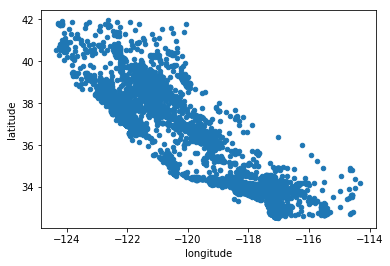

In [15]:
traing_housing = start_train_set.copy()
traing_housing.plot(kind='scatter', x='longitude', y='latitude')

##### 若加上参数alpha=0.1可以看到数据高密度的区域，若alpha设为1，则和上面一样，alpha越靠近0则只加深越 高密度的地方

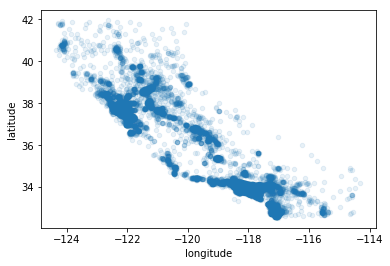

In [16]:
traing_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

##### 为了查看目标median_house_value的在各个地区的分布情况，所以可以增加参数c（用于对某参数显示颜 色），参数s（表示某参数圆的半径），cmap表示一个colormap，jet为一个蓝到红的颜色，colorbar为右侧颜 色条

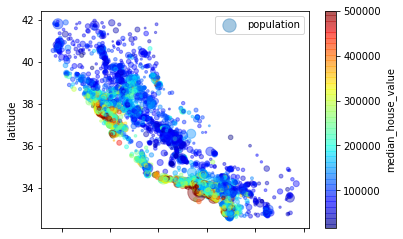

In [17]:
traing_housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, c='median_house_value', 
                   s=housing['population']/100, label='population', cmap='jet', colorbar=True)
plt.legend()

#### 查看特征之间的相关性

In [18]:
corr_matrix = traing_housing.corr() # 协方差矩阵
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

##### 上面只是计算了线性相关性，而特征之间可能是非线性的关系，因此需要画出图来看一下变量之间是否相关。

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027223DF1CC0>,
      dtype=object)

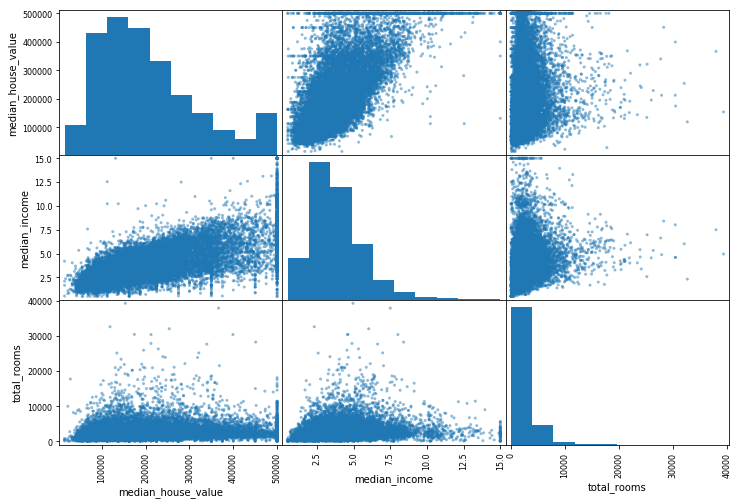

In [19]:
from pandas.tools.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms']
scatter_matrix(housing[attributes], figsize=(12,8))

#### 特征组合 两个特征对目标的相关性都不强，但是组合起来可能有较大的提升。

In [20]:
traing_housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
traing_housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
traing_housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = traing_housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

### 6.准备数据（数据预处理)

#### 首先分开特征（feature）和目标标签（label）

In [21]:
train_house = start_train_set.drop(['median_house_value'], axis=1)
train_house_labels = start_train_set['median_house_value'].copy()

#### 数据清洗

对于缺失值的处理有三种方案：
1.去掉含有缺失值的个体（dropna）
2.去掉含有缺失值的整个特征（drop）
3.给缺失值补上一些值（0、平均数、中位数等）（fillna）

In [22]:
#train_house.dropna(subset=['total_bedrooms']) # 1
#train_house.drop(['total_bedrooms'], axis=1) # 2

median = train_house['total_bedrooms'].median()
train_house['total_bedrooms'].fillna(median) # 3 # 为了得到更多可利用的数据，在这里我们选择方案3

17606     351.0
18632     108.0
14650     471.0
3230      371.0
3555     1525.0
19480     588.0
8879      317.0
13685     293.0
4937      465.0
4861      229.0
16365     951.0
19684     559.0
19234     501.0
13956     582.0
2390      495.0
11176     649.0
15614     545.0
2953      251.0
13209     409.0
6569      261.0
5825      913.0
18086     538.0
16718     945.0
13600     278.0
13989     444.0
15168     190.0
6747      563.0
7398      366.0
5562      133.0
16121     416.0
          ...  
12380     767.0
5618       24.0
10060     539.0
18067     438.0
4471      797.0
19786     300.0
9969      393.0
14621    1051.0
579       302.0
11682    1615.0
245       460.0
12130     537.0
16441     544.0
11016     428.0
19934     422.0
1364       34.0
1236      829.0
5364      272.0
11703     300.0
10356     449.0
15270     515.0
3754      373.0
12166     756.0
6003      932.0
7364      212.0
6563      236.0
12053     294.0
13908     872.0
11159     380.0
15775     682.0
Name: total_bedrooms, Le

##### Scikit-Learn也存在对缺失值处理的类Imputer,使用Imputer函数需要先定义一个补缺失值的策略（如median），由于median策略只能对 实数值有效，所以需要将文本属性先去除，然后再补缺失值。最后使用fit方法对变量执行相应操作。

In [23]:
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median') # 补缺失值的策略
housing_num = train_house.drop('ocean_proximity', axis=1) # 将文本属性先去除
imputer.fit(housing_num) # fit方法对变量执行相应操作, 并不是原地操作

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

##### 对数据缺失值补全以后，一般需要转化为Numpy的矩阵格式，方便模型的输入,可以调用Imputer的 transform()方法，当然fit和transform也可以合起来使用，即fit_transform()

In [24]:
X = imputer.transform(housing_num)
# X = imputer.fit_transform(housing_num)

# 也可以将 numpy 矩阵转化为 DataFrame
housing_df = pd.DataFrame(X, columns=housing_num.columns)

#### 处理类别文本特征

##### 由于文本属性不能作median等操作，所以需要将文本特征编码为实数特征，对应Scikit-Learn中的类为 LabelEncoder，通过调用LabelEncoder类，再使用fit_transform()方法自动将文本特征编码

In [25]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = train_house["ocean_proximity"] # 要编码的特征
housing_cat_encoded = encoder.fit_transform(housing_cat)
print(housing_cat_encoded)
print(encoder.classes_)

[0 0 4 ... 1 0 3]
['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


##### 每个元素的相似性应趋于相等。如果该数字编码作为label，则只是一个标签，没有什么影响。但是如果用于特征，则这种数字编码不适用，应该采用one hot编码

In [26]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_cat_hot = encoder.fit_transform(housing_cat_encoded.reshape(-1, 1))

##### 默认的输出结果为稀疏矩阵Scipy（sparse matrix），而不是Numpy，由于矩阵大部分为0，浪费空间，所以使 用稀疏矩阵存放，如果想看矩阵的具体样子，则用toarray（）方法变为dense matrix（Numpy）。

In [27]:
housing_cat_hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

##### 上述文本编码先经过数字编码再转为one hot编码用了两步，当然也可以一步到位，直接从文本编码到one hot，对应Scikit-Learn中的类为LabelBinarizer

In [28]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer(sparse_output=True) # False 返回的结果为numpy矩阵
housing_cat_1hot = encoder.fit_transform(housing_cat)

#### 自定义Transformer

##### 由于Scikit-Learn中的函数中提供的Transformer方法并不一定适用于真实情形，所以有时候需要自定义一个 Transformer，与Scikit-Learn能够做到“无缝结合”，比如pineline（以后会说到）。定义类时需要加入基础类： BaseEstimator（必须），以及TransformerMixin（用于自动生成fit_transformer()方法）。下面是一个例子：用 于增加组合特征的Trainsformer

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self):
        return None
    def fit(self, X, y=None):
        return self # 不需要作甚么
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        return np.c_[X, rooms_per_household, population_per_household]
    
attr_adder = CombinedAttributesAdder()
housing_extra_attributes = attr_adder.transform(housing.values)

#### 特征缩放

##### 由于机器学习算法在不同尺度范围的特征之间表现的不好，比如total number of rooms范围是6-39320，而 median_incomes范围是0-15。因此需要对特征的范围进行缩放，对应Scikit-Learn中的类为

#### Transformation Pipelines

上述有非常多的转换操作，并按一定的顺序执行，但是再次处理其他数据（如测试数据）时需要重 新调用执行众多步骤，代码看起来过于繁琐。所以Scikit-Learn提供了Pineline类来帮助这种一系列的转换，把 这些转换封装为一个转换

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy='median')),
    ('attributes_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])
housing_num_tr = num_pipeline.fit_transform(housing_num)

Pipeline是由（name(名字)，Estimator(类)）对组成，但最后一个必须为transformer，这是因为要形成 fit_transform()方法

上面的pineline只是用于处理实数特征的，对于处理类别特征的还有另一个Pineline，这就可以使用 FearureUnion类来结合多个pineline，多个Pineline可以并行处理，最后将结果拼接在一起输出。

由于Scikit-Learn没有处理Pandas数据的DataFrame，因此需要自己自定义一个如下：

In [31]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSeletor(BaseEstimator, TransformerMixin):
    def __init__(self, attributes_names):
        self.attributes_names = attributes_names
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X[self.attributes_names].values
# 在0.19.0版本则会报 错，因此需要自己定义一个新的LabelBinarizer_new()，代码如下；0.20.0版本以后可以使用新的类 CategoricalEncoder()
class LabelBinarizer_new(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.encoder = None
        return self
    def transform(self, X, y=None):
        if self.encoder is None:
            self.encoder = LabelBinarizer()
            res = self.encoder.fit_transform(X)
        else:
            res = self.encoder.transform(X)
        return res

In [32]:
from sklearn.pipeline import FeatureUnion
num_attrs = list(housing_num)
cat_attrs = ['ocean_proximity']
num_pipeline = Pipeline([
    ('selector', DataFrameSeletor(num_attrs)), # 选取属性值为数值类型的特征
    ('imputer', Imputer(strategy='median')), # 处理缺失值
    ('attributes_adder', CombinedAttributesAdder()), # 增加相关特征组合
    ('std_sclaer', StandardScaler()), # 特征缩放
])
cat_pipeline = Pipeline([
    ('selector', DataFrameSeletor(cat_attrs)), # 选取属性值为文本类型的特征
    ('encoder', LabelBinarizer_new()), # OneHot 编码
])
full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])
housing_prepared = full_pipeline.fit_transform(traing_housing)

### 7.选择及训练模型

首先尝试训练一个线性回归模型（LinearRegression ）

In [33]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, train_house_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

训练完成，然后评估模型，计算训练集中的均方误差（RMSE）

In [34]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
mse = mean_squared_error(train_house_labels, housing_predictions)
print(np.sqrt(mse)) # 到线性回归模型的训练集均方根误差为68911.7605423384

68911.7605423384


决策树模型（DecisionTreeRegressor)

In [35]:
from sklearn.tree import DecisionTreeRegressor

dt_rg = DecisionTreeRegressor()
dt_rg.fit(housing_prepared, train_house_labels)
preds = dt_rg.predict(housing_prepared)
mse = mean_squared_error(train_house_labels, preds)
print(np.sqrt(mse))

0.0


训练误差小的模型并不代表为 好模型，这是因为模型可能过度地学习了训练集的数据，只是在训练集上的表现好（即过拟合），一旦测试新 的数据表现就会很差。

因此在训练的时候需要将部分的训练数据提取出来作为验证集，验证该模型是否对此问题适用。其中比较常用 的就是交叉验证法。

In [38]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dt_rg, housing_prepared, train_house_labels, scoring="neg_mean_squared_error", cv=10)
rmse = np.sqrt(-scores)

In [39]:
def display_scores(score):
    print("scores: ", score)
    print("Mean: ", score.mean())
    print("Std: ", score.std())

In [41]:
display_scores(rmse)

scores:  [70204.5011218  69884.74331779 69892.68964325 72542.11586461
 72332.20394373 74591.77933637 73167.71274553 69622.80742622
 75372.32915882 68338.61686201]
Mean:  71594.94994201441
Std:  2222.8973373743966


#### 模型微调

##### 1. 网格搜索，找到好的超参数组合

In [43]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2,4,6,8]}, # 3*4 = 12 种组合
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features':[2,3,4]} # 2*3 = 6种组合
]

In [44]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, train_house_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]}, {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [46]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [48]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=8, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [49]:
# 评估得分：
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res['mean_test_score'], cv_res['params']):
    print(np.sqrt(-mean_score), params)

65111.46910994835 {'max_features': 2, 'n_estimators': 3}
55559.24210436014 {'max_features': 2, 'n_estimators': 10}
52496.001551500376 {'max_features': 2, 'n_estimators': 30}
59484.370228259686 {'max_features': 4, 'n_estimators': 3}
51995.96786542238 {'max_features': 4, 'n_estimators': 10}
50085.76874608461 {'max_features': 4, 'n_estimators': 30}
58864.68888797536 {'max_features': 6, 'n_estimators': 3}
52224.656344674 {'max_features': 6, 'n_estimators': 10}
49688.78525887345 {'max_features': 6, 'n_estimators': 30}
57853.35490817705 {'max_features': 8, 'n_estimators': 3}
51994.89604892215 {'max_features': 8, 'n_estimators': 10}
49569.41489810606 {'max_features': 8, 'n_estimators': 30}
62153.865134062675 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53524.37379514246 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60181.10731652174 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52169.69528426252 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

##### 2. 随机搜索

#### 分析最佳模型和它们的误差

In [53]:
# 可以指出每个属性对于做出准确预测的相对重要性
feature_importances = grid_search.best_estimator_.feature_importances_

In [54]:
feature_importances

array([7.17600417e-02, 6.40530919e-02, 4.54603174e-02, 1.82217965e-02,
       1.59036024e-02, 1.60829244e-02, 1.58125396e-02, 4.02246749e-01,
       6.47510618e-02, 1.12819405e-01, 5.62012814e-03, 1.58514848e-01,
       1.16080775e-04, 4.20101194e-03, 4.43640078e-03])

In [57]:
#将重要性分数和属性名放到一起
extra_attrs = ['rooms_per_household', 'population_per_household']
cat_one_hot_attrs = list(encoder.classes_)
attrs = num_attrs + cat_one_hot_attrs + extra_attrs

sorted(zip(feature_importances, attrs), reverse=True)

[(0.40224674947858424, 'median_income'),
 (0.1585148479500729, 'NEAR BAY'),
 (0.11281940530350335, 'INLAND'),
 (0.0717600416645395, 'longitude'),
 (0.06475106176812548, '<1H OCEAN'),
 (0.06405309188194723, 'latitude'),
 (0.045460317409945133, 'housing_median_age'),
 (0.018221796543636485, 'total_rooms'),
 (0.016082924362533252, 'population'),
 (0.015903602398432717, 'total_bedrooms'),
 (0.015812539604612867, 'households'),
 (0.00562012813874339, 'ISLAND'),
 (0.004436400777465926, 'population_per_household'),
 (0.004201011942742682, 'rooms_per_household'),
 (0.00011608077511480218, 'NEAR OCEAN')]

### 用测试集评估系统

In [60]:
#从测试集得到预测值和标签，运行full_pipeline转换数据(调用transform, 不是fit_transform)，再用测试集评估最终模型

final_model = grid_search.best_estimator_

# 获取测试集数据
X_test = start_test_set.drop('median_house_value', axis=1)
y_test = start_test_set['median_house_value'].copy()

# 转换数据
X_test_prepared = full_pipeline.transform(X_test)

# 预测
final_predictions = final_model.predict(X_test_prepared)

# 评估
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [61]:
final_rmse

48598.509463861505

## Question 1

In [63]:
from sklearn.svm import SVR

param_grid = [
    {'kernel': ['linear'], 'C': [10, 100, 1000]}
]

svr = SVR()
grid_se = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_se.fit(housing_prepared, train_house_labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['linear'], 'C': [10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=0)

In [64]:
neg_mse = grid_se.best_score_

rmse = np.sqrt(-neg_mse)

In [65]:
rmse

70471.58050980096

## Question 2

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal
param_grid = {
    'kernel': ['linear'], 
     'C': reciprocal(20, 200000),
    'gamma': expon(scale=1.0),
}

grid_search = RandomizedSearchCV(
    svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_iter=50, n_jobs=4
)

grid_search.fit(housing_prepared, train_house_labels)
#help(RandomizedSearchCV)

In [ ]:
neg_mse = grid_search.best_score_

rmse = np.sqrt(-neg_mse)

## Question 3

In [1]:
# 在Pipeline 中添加一个选择最重要属性的转换器



## Question 4

In [ ]:
prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('svm_reg', SVR(**rnd_search.best_params_))
])